# Analyzing data from Steam portal

Goal: describe the dataset, investigate how sales, ratings, and price are related, draw conclusions based on the analysis

Methods: pandas data manipulation using Craig Kelly's Steam dataset (https://data.world/craigkelly/steam-game-data) and Eric Grinsteins' "20 Years of Games" dataset (https://www.kaggle.com/egrinstein/20-years-of-games)

The initial code was created in collaboration with Kate.

## Data

In [1]:
# imports
import pandas as pd
import numpy as np
from tqdm import tqdm

# for graphs
import seaborn as sns 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import first csv with Steam data

df = pd.read_csv("games-features.csv") # this file should include the Steam data as found here: https://data.world/craigkelly/steam-game-data
print("Steam has " + str(len(df)) + " entries")

# import second csv with IGN scores

dfign = pd.read_csv("ign.csv") # this file should include the IGN data as found here: https://www.kaggle.com/egrinstein/20-years-of-games
print("IGN has " + str(len(dfign)) + " entries")

Steam has 13357 entries
IGN has 18625 entries


In [3]:
df.head(3)

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [4]:
# show the columns of Steam dataframe; there are many.

list(df.columns.values)

['QueryID',
 'ResponseID',
 'QueryName',
 'ResponseName',
 'ReleaseDate',
 'RequiredAge',
 'DemoCount',
 'DeveloperCount',
 'DLCCount',
 'Metacritic',
 'MovieCount',
 'PackageCount',
 'RecommendationCount',
 'PublisherCount',
 'ScreenshotCount',
 'SteamSpyOwners',
 'SteamSpyOwnersVariance',
 'SteamSpyPlayersEstimate',
 'SteamSpyPlayersVariance',
 'AchievementCount',
 'AchievementHighlightedCount',
 'ControllerSupport',
 'IsFree',
 'FreeVerAvail',
 'PurchaseAvail',
 'SubscriptionAvail',
 'PlatformWindows',
 'PlatformLinux',
 'PlatformMac',
 'PCReqsHaveMin',
 'PCReqsHaveRec',
 'LinuxReqsHaveMin',
 'LinuxReqsHaveRec',
 'MacReqsHaveMin',
 'MacReqsHaveRec',
 'CategorySinglePlayer',
 'CategoryMultiplayer',
 'CategoryCoop',
 'CategoryMMO',
 'CategoryInAppPurchase',
 'CategoryIncludeSrcSDK',
 'CategoryIncludeLevelEditor',
 'CategoryVRSupport',
 'GenreIsNonGame',
 'GenreIsIndie',
 'GenreIsAction',
 'GenreIsAdventure',
 'GenreIsCasual',
 'GenreIsStrategy',
 'GenreIsRPG',
 'GenreIsSimulation',
 '

In [5]:
# show the columns of IGN dataframe; there are much fewer.

list(dfign.columns.values)

['Unnamed: 0',
 'score_phrase',
 'title',
 'url',
 'platform',
 'score',
 'genre',
 'editors_choice',
 'release_year',
 'release_month',
 'release_day']

We will continue working with the Steam data for now. The IGN data will be used to supplement it for the games where Metacritic scores are missing.

## Games pricing and downloads

In [6]:
# check what currencies are listed in the file

df["PriceCurrency"].value_counts()

USD    10739
        2618
Name: PriceCurrency, dtype: int64

In [7]:
# find free games

df["IsFree"].value_counts()
FREE = len(df[df["IsFree"] == True])
FREE

1045

In [8]:
# find games with price in USD

df[df["PriceCurrency"] == "USD"]
USD = len(df[df["PriceCurrency"] == "USD"])
USD

10739

In [9]:
# find games without currency listed

NONE = len(df[df["PriceCurrency"] != "USD"])
NONE

2618

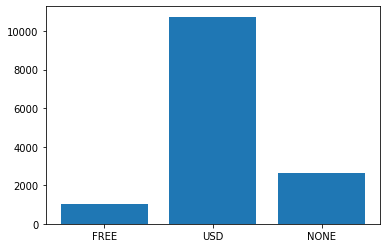

In [10]:
# plot graph of the different financial options

ans = [FREE, USD, NONE]
currency = ["FREE", "USD", "NONE"]

plt.bar(currency, ans)
None 

# plt.savefig('currencies.png', bbox_inches='tight') # saves graph as png into working dir

### How expensive is each game

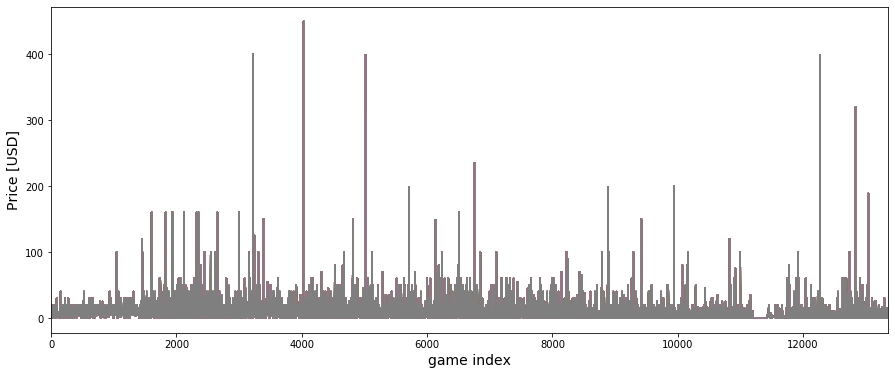

In [11]:
# rough plot of each game's price to get an impression of the data

for i in df[df["PriceCurrency"] == "USD"]:

    dfp = df["PriceInitial"].plot(figsize=(15,6))

plt.xlabel('game index', fontsize=14)
plt.ylabel('Price [USD]', fontsize=14)

dfp
None

The prices seem to vary quite a bit, with some games being unusually expensive.

### Downloads vs Price

In [12]:
# find how many games at each price

df_price = df[df["PriceCurrency"] == "USD"]
s_price = df_price["PriceInitial"].sort_values()
s_price = s_price.value_counts()


df_price_sorted = pd.DataFrame(s_price).reset_index().sort_values("index")
df_price_sorted.columns=['Price', 'Count']


In [13]:
df_price_sorted.head()

,Price,Count
87,0.50,1
49,0.90,1
10,0.99,387
60,1.00,1
69,1.20,1


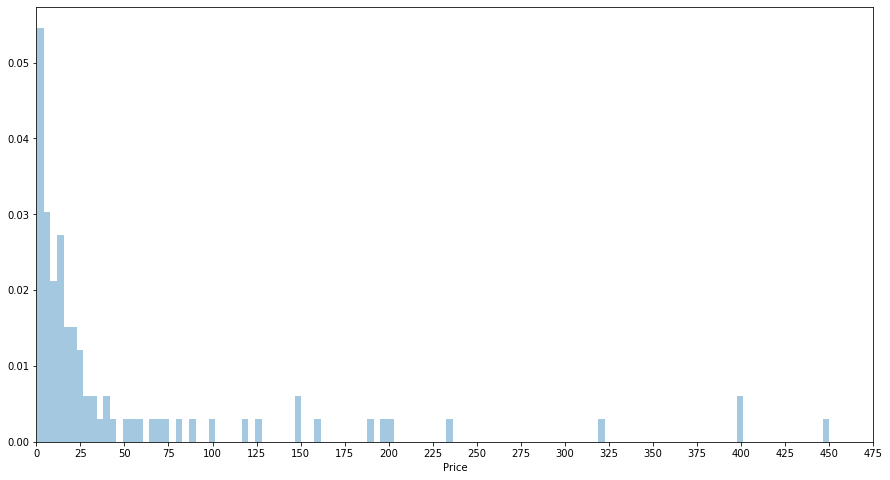

In [44]:
plt.figure(figsize=(15, 8))
g = sns.distplot(df_price_sorted["Price"], bins=120, hist=True, norm_hist=True, kde=False)

# control x and y limits

plt.ylim(0,None)
plt.xlim(0, None)
plt.xticks(np.arange(0, 500, step=25))
None

The distribution of game prices become more apparent in the histogram above. The majority of games are indeed in the price range of 0 < x <= 50 USD.

The plot does not include free games.

In [15]:
df_price_sorted["Price"].describe()

count     88.000000
mean      52.259886
std       91.096372
min        0.500000
25%        5.725000
50%       15.495000
75%       46.240000
max      449.990000
Name: Price, dtype: float64

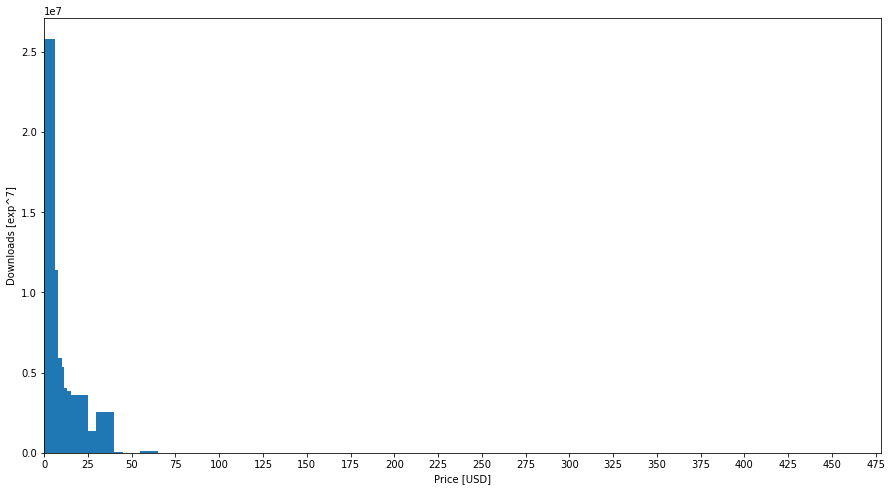

In [16]:
# find downloads by price

plt.figure(figsize=(15, 8))
plt.bar(df_price["PriceInitial"].sort_values(), df_price["SteamSpyOwners"])
plt.xlabel("Price [USD]")
plt.ylabel("Downloads [exp^7]")
plt.ylim(0,None)
plt.xlim(0, None)
plt.xticks(np.arange(0, 500, step=25))
None

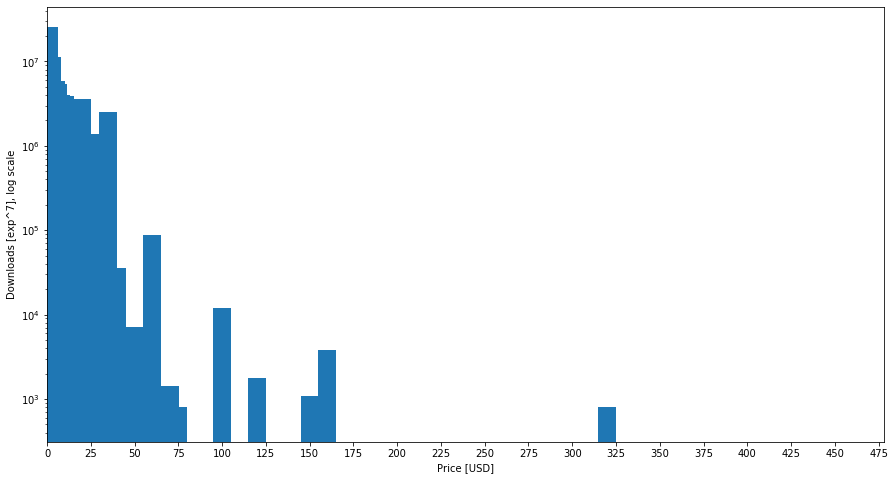

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df_price["PriceInitial"].sort_values(), df_price["SteamSpyOwners"])

ax.set_xlabel('Price [USD]')
ax.set_ylabel('Downloads [exp^7], log scale')
ax.set_yscale('log')
plt.xlim(0, None)
plt.xticks(np.arange(0, 500, step=25))
None

These plots above show that the lower the price for the game, the more downloads it gets. As long as it is below 50 USD, people will want to buy it.

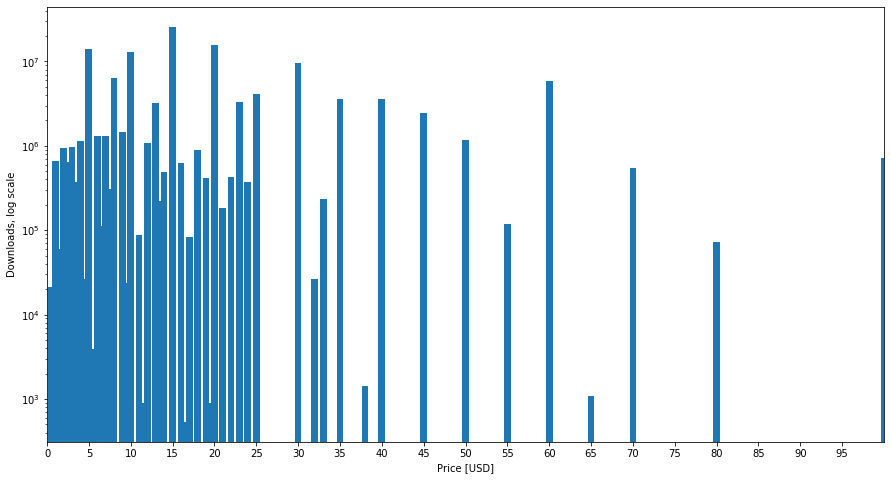

In [18]:
# some games are unreasonably priced, ignore them here
# without free games

df_normalprice = df[df["PriceInitial"] <= 100] # only prices up to 100 USD
df_normalpricenot0 = df_normalprice[df_normalprice["PriceInitial"] > 0] # without free games

fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(df_normalpricenot0["PriceInitial"],
        df_normalpricenot0["SteamSpyOwners"])
plt.xlabel("Price [USD]")
plt.ylabel("Downloads, log scale")
ax.set_yscale('log')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=5))
None

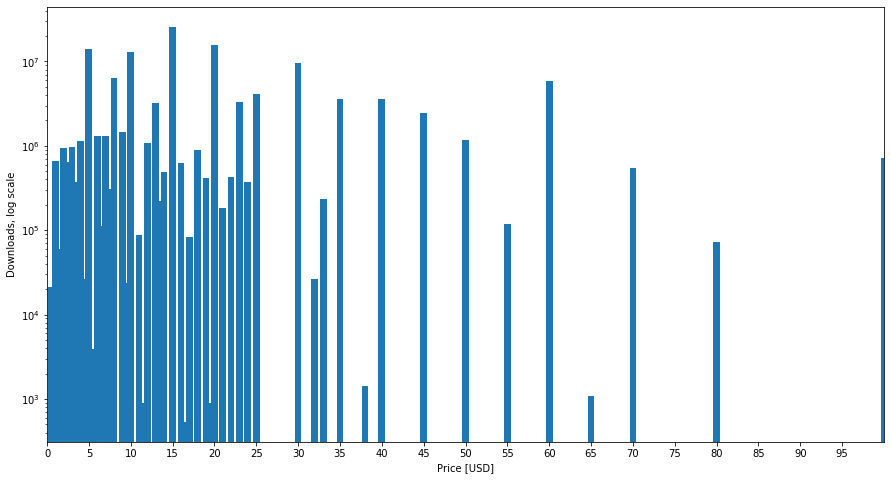

In [19]:
# with free games

fig, ax = plt.subplots(figsize=(15, 8))
df_normalprice = df[df["PriceInitial"] <= 100] # only prices up to 100 USD

plt.bar(df_normalpricenot0["PriceInitial"],
        df_normalpricenot0["SteamSpyOwners"])
plt.xlabel("Price [USD]")
plt.ylabel("Downloads, log scale")
ax.set_yscale('log')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=5))
None

## Game scores

### Metaritic scores

In [20]:
# access rating by Metacritic, except 0
# the majority of 0's are unrated by Metacritic

df["Metacritic"].value_counts()
df[df["Metacritic"] != 0]
df_metanot0 = df[df["Metacritic"] != 0]
df_metanot0["Metacritic"].value_counts()

80    103
72     97
76     91
77     90
68     89
74     88
75     88
79     81
73     81
70     81
78     78
81     76
69     70
82     69
83     69
66     66
84     58
86     57
65     55
63     52
71     52
67     51
61     43
85     42
59     40
64     38
62     37
87     34
57     32
58     28
     ... 
94     11
52     11
92     10
43      9
50      8
48      8
41      8
47      7
45      6
93      5
46      5
40      5
96      4
38      4
44      3
95      3
39      3
35      2
37      2
34      2
32      2
27      1
29      1
33      1
42      1
36      1
30      1
24      1
22      1
20      1
Name: Metacritic, Length: 71, dtype: int64

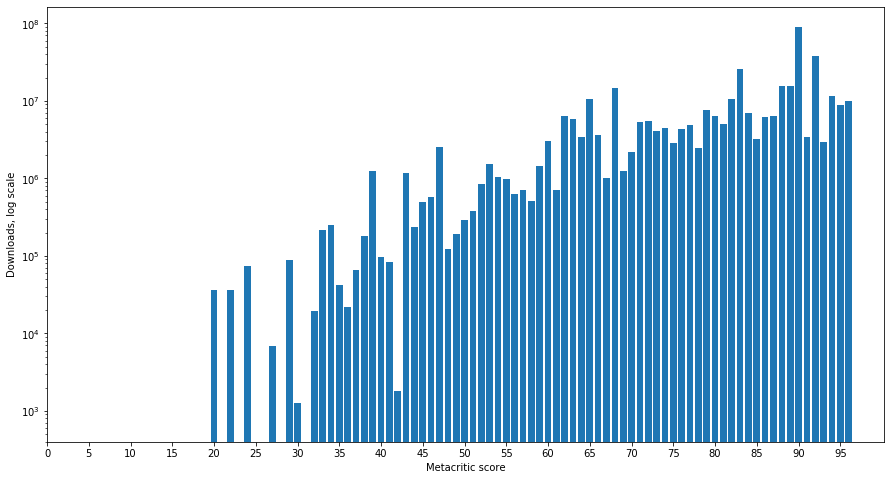

In [21]:
df_metascores = df[df["Metacritic"] > 0]  # only non-0 ratings

fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(df_metascores["Metacritic"], df_metascores["SteamSpyOwners"])
plt.xlabel("Metacritic score")
plt.ylabel("Downloads, log scale")
ax.set_yscale('log')
plt.xlim(0, None)
plt.xticks(np.arange(0, 100, step=5))
None

As long as a game is at least decently rated, it will be downloaded. 
Of note are the games that are rated "0". This can either indicate an abysmal game, or, more likely, a game that has not been rated by Metacritic. As there are many indie studio games published on Steam, the majority of the 0-rated games might in fact be little known indie games.

### Join Steam data with IGN data to supplement ratings

In [22]:
df[df["ResponseName"].str.contains("Counter-Strike")] # find a game by title

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
7,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,
8,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,
11,240,240,Counter-Strike: Source,Counter-Strike: Source,Nov 1 2004,0,0,1,0,88,...,,,English French German Italian Japanese Korean ...,None,Minimum: 1.7 GHz Processor 512MB RAM DirectX® ...,,Minimum: 1.7 GHz Processor 512MB RAM Mouse Key...,,Minimum: OS X version Leopard 10.5.8 Snow Leop...,
27,730,730,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,...,,,Czech Danish Dutch English* Finnish French Ger...,http://blog.counter-strike.net/,Minimum:OS: Windows(r) 7/Vista/XPProcessor: In...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,
927,100,80,Counter-Strike: Condition Zero Deleted Scenes,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,
3114,273110,273110,Counter-Strike Nexon: Zombies,Counter-Strike Nexon: Zombies,Oct 7 2014,0,0,1,7,0,...,Copyright (c) 2015 NEXON Korea Corporation & V...,,English* French German Polish Russian Italian ...,None,Minimum:OS: Windows XPProcessor: Intel(r) Cele...,Recommended:OS: Windows 7 or laterProcessor: I...,,,,


In [23]:
# merge two frames and match "ResponseName" with "title" colums to find same games

dfjoin = df.merge(dfign, left_on='QueryName',
                  right_on='title').reset_index(drop=True)

dfjoin.head(3)

# dfjoin[["ResponseName","title"]] #check whether merge worked

# len(dfjoin) #show how many games were matched

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,Great,Counter-Strike,/games/counter-strike/pc-15191,PC,8.9,Shooter,Y,2000,11,22
1,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,Good,Counter-Strike,/games/counter-strike/xbox-482217,Xbox,7.9,Shooter,N,2003,11,18
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,Great,Day of Defeat,/games/day-of-defeat/pc-549934,PC,8.0,Shooter,N,2003,5,23


In [24]:
dfjoin.dtypes

QueryID                          int64
ResponseID                       int64
QueryName                       object
ResponseName                    object
ReleaseDate                     object
RequiredAge                      int64
DemoCount                        int64
DeveloperCount                   int64
DLCCount                         int64
Metacritic                       int64
MovieCount                       int64
PackageCount                     int64
RecommendationCount              int64
PublisherCount                   int64
ScreenshotCount                  int64
SteamSpyOwners                   int64
SteamSpyOwnersVariance           int64
SteamSpyPlayersEstimate          int64
SteamSpyPlayersVariance          int64
AchievementCount                 int64
AchievementHighlightedCount      int64
ControllerSupport                 bool
IsFree                            bool
FreeVerAvail                      bool
PurchaseAvail                     bool
SubscriptionAvail        

### Remove duplicates

In [25]:
df_dd=dfjoin.copy()
df_dd=df_dd.drop_duplicates(subset=['QueryName', 'SteamSpyOwners']) # remove all duplicates by QueryID

In [26]:
df_dd[df_dd["QueryName"].str.contains("Portal 2")]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
21,620,620,Portal 2,Portal 2,Apr 18 2011,0,0,1,1,95,...,Amazing,Portal 2,/games/portal-2/pc-14237322,PC,9.5,Shooter,Y,2011,4,18


### Adjust scores

In [27]:
metaseries = df_dd["Metacritic"]/10 

In [28]:
df_dd["Metacritic"] = metaseries

In [29]:
# there are many duplicates because Steam sells different versions (preorder, add-ons,...)

df_dd[["QueryName", "title"]]

,QueryName,title
0,Counter-Strike,Counter-Strike
2,Day of Defeat,Day of Defeat
3,Half-Life: Opposing Force,Half-Life: Opposing Force
4,Half-Life,Half-Life
6,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero
8,Half-Life: Blue Shift,Half-Life: Blue Shift
9,Half-Life 2,Half-Life 2
11,Day of Defeat: Source,Day of Defeat: Source
12,Half-Life 2: Episode One,Half-Life 2: Episode One
13,Portal,Portal


In [30]:
# generate new df to try out things

dftest = df_dd

### Get a mean score and find the top games

In [31]:
# new column with value 0.0 for each row -> will be filled with score means

dftest["mean"] = 0.0
dftest.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,mean
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,8.8,...,Counter-Strike,/games/counter-strike/pc-15191,PC,8.9,Shooter,Y,2000,11,22,0.0
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,7.9,...,Day of Defeat,/games/day-of-defeat/pc-549934,PC,8.0,Shooter,N,2003,5,23,0.0
3,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0.0,...,Half-Life: Opposing Force,/games/half-life-opposing-force/pc-11667,PC,7.5,Action,N,1999,11,24,0.0
4,70,70,Half-Life,Half-Life,Nov 8 1998,0,0,1,1,9.6,...,Half-Life,/games/half-life-1/pc-3107,PC,9.5,Shooter,Y,1998,11,25,0.0
6,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,6.5,...,Counter-Strike: Condition Zero,/games/counter-strike-condition-zero/pc-16953,PC,7.0,Shooter,N,2004,3,23,0.0


In [32]:
# the following two cells of code throw some warnings
# I will turn them off for now

import warnings
warnings.filterwarnings('ignore')

# create table only with scores of IGN and Metacritic and number of downloads

new_scores = dftest[["QueryName", "SteamSpyOwners",  "Metacritic", "score"]]
new_scores["mean"] = 0.0
new_scores.head()

,QueryName,SteamSpyOwners,Metacritic,score,mean
0,Counter-Strike,13033334,8.8,8.9,0.0
2,Day of Defeat,7621102,7.9,8.0,0.0
3,Half-Life: Opposing Force,5399499,0.0,7.5,0.0
4,Half-Life,5927504,9.6,9.5,0.0
6,Counter-Strike: Condition Zero,10489261,6.5,7.0,0.0


In [33]:
new_scores['mean'] = (new_scores['score'] + new_scores['Metacritic']) * 0.5
new_scores['mean'][new_scores['Metacritic'] == 0.0] = new_scores['score'][new_scores['Metacritic'] == 0.0]
new_scores['mean'][new_scores['score'] == 0.0] = new_scores['Metacritic'][new_scores['score'] == 0.0]

In [34]:
# here the new mean is shown

new_scores.head()

,QueryName,SteamSpyOwners,Metacritic,score,mean
0,Counter-Strike,13033334,8.8,8.9,8.85
2,Day of Defeat,7621102,7.9,8.0,7.95
3,Half-Life: Opposing Force,5399499,0.0,7.5,7.50
4,Half-Life,5927504,9.6,9.5,9.55
6,Counter-Strike: Condition Zero,10489261,6.5,7.0,6.75


In [35]:
# drop all with downloads = 0, this number is either wrong or they are not available on steam

new_scores = new_scores[new_scores.SteamSpyOwners != 0]

In [36]:
# this df now only contains unique games which all appear to be sold on steam

new_scores.head()

,QueryName,SteamSpyOwners,Metacritic,score,mean
0,Counter-Strike,13033334,8.8,8.9,8.85
2,Day of Defeat,7621102,7.9,8.0,7.95
3,Half-Life: Opposing Force,5399499,0.0,7.5,7.50
4,Half-Life,5927504,9.6,9.5,9.55
6,Counter-Strike: Condition Zero,10489261,6.5,7.0,6.75


In [37]:
# number of top 10% with regards to scores

int(len(new_scores)/10)

119

In [38]:
# get a list with the top 10%

amount = int(len(new_scores)/10)

topscore = new_scores.sort_values(
    ["mean"], ascending=False).reset_index(drop=True).head(amount)

topscore

,QueryName,SteamSpyOwners,Metacritic,score,mean
0,Grand Theft Auto V,5886074,9.6,10.0,9.80
1,BioShock,3635595,9.6,9.7,9.65
2,Half-Life 2,9901173,9.6,9.7,9.65
3,Grand Theft Auto: San Andreas,2796598,9.3,9.9,9.60
4,Undertale,2105743,9.2,10.0,9.60
5,Half-Life,5927504,9.6,9.5,9.55
6,Superbrothers: Sword & Sworcery EP,748964,0.0,9.5,9.50
7,Mass Effect 2,1718886,9.4,9.6,9.50
8,Great Big War Game,12734,0.0,9.5,9.50
9,Grand Theft Auto IV,4174362,9.0,10.0,9.50


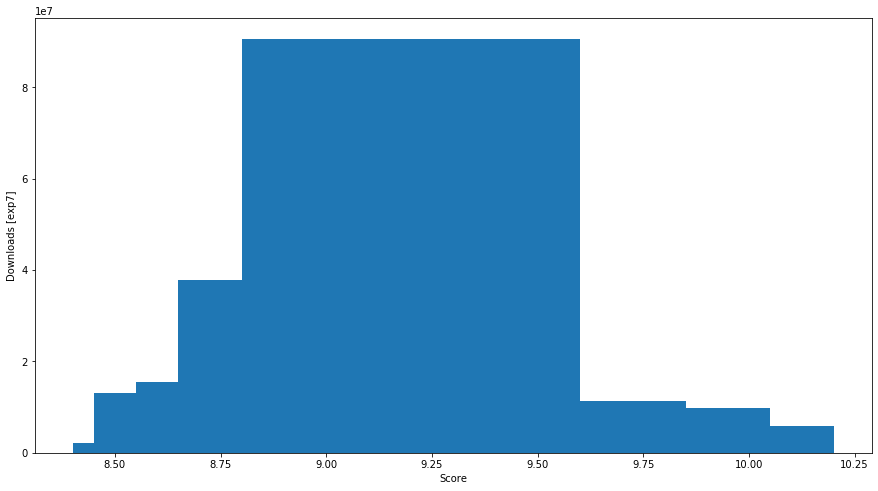

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(topscore["mean"], topscore["SteamSpyOwners"])

ax.set_xlabel('Score')
ax.set_ylabel('Downloads [exp7]')

None

In [40]:
# create a new column with rounded score means to visualize game sales as box plots

topscore["mean_1dp"]=topscore["mean"].round(decimals=1)

In [41]:
topscore

,QueryName,SteamSpyOwners,Metacritic,score,mean,mean_1dp
0,Grand Theft Auto V,5886074,9.6,10.0,9.80,9.8
1,BioShock,3635595,9.6,9.7,9.65,9.6
2,Half-Life 2,9901173,9.6,9.7,9.65,9.6
3,Grand Theft Auto: San Andreas,2796598,9.3,9.9,9.60,9.6
4,Undertale,2105743,9.2,10.0,9.60,9.6
5,Half-Life,5927504,9.6,9.5,9.55,9.6
6,Superbrothers: Sword & Sworcery EP,748964,0.0,9.5,9.50,9.5
7,Mass Effect 2,1718886,9.4,9.6,9.50,9.5
8,Great Big War Game,12734,0.0,9.5,9.50,9.5
9,Grand Theft Auto IV,4174362,9.0,10.0,9.50,9.5


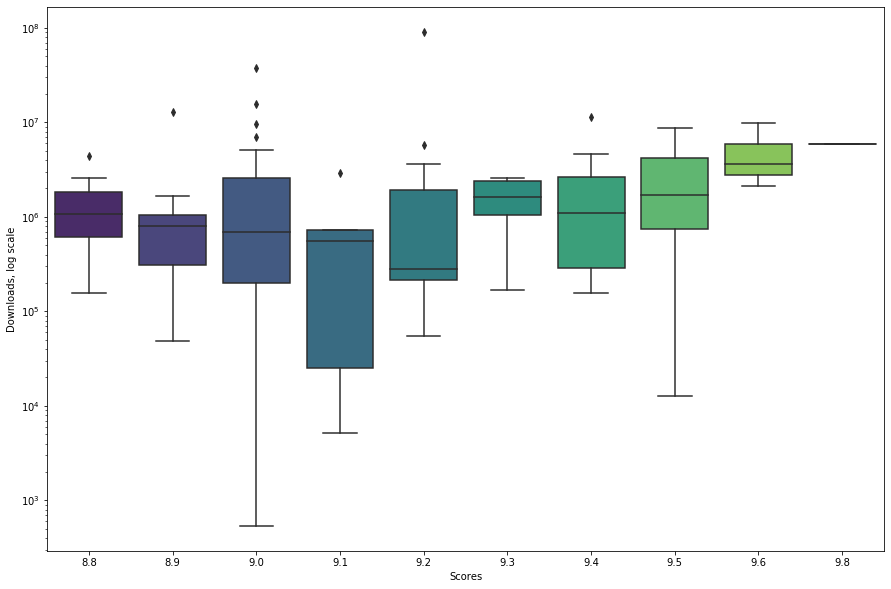

In [42]:
# boxplots of all series

plt.figure(figsize=(15, 10))

ax = sns.boxplot(data=topscore, x="mean_1dp", y="SteamSpyOwners", palette="viridis")
ax.set_yscale('log')
ax.xaxis.set_label_text("Scores")
ax.yaxis.set_label_text("Downloads, log scale")
None

As apparent from the boxplots, there are some games that are downloaded more than others in the same score bracket (outliers).
The one very highly rated game stands by itself. From the table we find it's Grand Theft Auto V. Especially in the bracket of 9.0, there are particularly many outliers, as well as many games that were downloaded rarely.

## Findings

Overall, we found the following things:
    - People like free games. They are amongst the most downloaded.
    - The mean price is 52.26 USD, and the most expensive game costs a whooping 449.90 USD
    - The lower quartile is at 5.73 USD, the second quartile at 15.50 USD and the upper quartile at 46.49 USD, indicating that the mean is quite a bit distorted due to the few very expensive games in the dataset.
    - The majority of games have at least a decent rating and very few received a score of under 20% 
    - Grand Theft Auto V is the top rated game and also one of the top-sellers